<a href="https://colab.research.google.com/github/JokMaker/summative-model-training-evaluation/blob/main/summative_assignment_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summative Assignment: Model Training and Evaluation

## Predicting Student Performance Using Machine Learning and Deep Learning

**Author:** Jok John Maker

**Date:** 20th Feb 2026



### Table of Contents
1. [Set Up Environment and Dependencies](#setup)
2. [Load and Explore the Dataset](#load)
3. [Data Preprocessing and Feature Engineering](#preprocess)
4. [Train-Test Split and Data Preparation](#split)
5. [Traditional Machine Learning Models (Scikit-learn)](#ml)
6. [Deep Learning Models (TensorFlow Sequential API)](#dl-seq)
7. [Deep Learning Models (TensorFlow Functional API & tf.data)](#dl-func)
8. [Hyperparameter Tuning and Experimentation](#tuning)
9. [Model Evaluation and Visualization](#eval)
10. [Error Analysis and Insights](#error)
11. [Experiment Tracking and Results Table](#results)



## Introduction and Problem Definition

Predicting student academic performance is a critical task in educational research, with implications for early intervention and resource allocation. In this project, we use two real-world datasets (`student-mat.csv` and `student-por.csv`) to build predictive models for student final grades. We compare traditional machine learning approaches with deep learning models, aiming to identify the most effective techniques and gain insights into the factors influencing student success.

**Mission Alignment:** This project aligns with the goal of leveraging data-driven methods to improve educational outcomes and support at-risk students.

## Problem Statement

The challenge of identifying students at risk of academic underperformance before they fail is critical for timely intervention. Recent studies show that prior grades, attendance, and behavioral factors are strong predictors of student outcomes [1][2]. This project investigates the predictive power of machine learning and deep learning models on student performance data, aiming to:

1. Determine the most predictive features of student success among demographic, social, and behavioral variables.
2. Compare the performance of traditional classifiers (Logistic Regression, Random Forest, SVM) against neural network architectures.
3. Evaluate the feasibility of early prediction using only pre-academic-year data.

The findings will contribute to the literature on educational data mining and provide evidence-based insights for developing early warning systems in secondary education [3][5].

## Literature Review: Machine Learning and Deep Learning Approaches for Student Performance Prediction

Machine learning (ML) and deep learning (DL) have become central to educational data mining, enabling early identification of students at risk of underperformance. Research shows that academic outcomes are shaped by a combination of demographic, behavioral, social, and emotional factors. Traditional grade monitoring is often reactive, while ML/DL models can proactively analyze multidimensional data to generate early warning signals and support interventions.

Recent studies highlight the effectiveness of supervised learning algorithms such as Random Forest, Logistic Regression, SVM, and Naïve Bayes for student performance prediction, with ensemble and hybrid methods often achieving the best results [1][2][3][5][6][8][9][10][11][12]. Deep learning, especially with neural network architectures like RNNs and LSTMs, has gained traction for modeling complex, non-linear relationships and temporal patterns in educational data [3][9]. Multimodal data fusion and knowledge tracing are emerging trends, integrating diverse data sources and tracking student learning over time [3][9][10].

Despite these advances, challenges remain. Many studies lack external validation and focus on single-institution datasets, limiting generalizability [6][8]. The timing of predictions, feature selection, and ethical considerations (such as algorithmic bias and data privacy) are ongoing concerns [6][7]. There is also a need for more comparative studies between ML and DL approaches, as well as greater transparency and interpretability in predictive models [3][9].

This project addresses these gaps by systematically comparing traditional ML algorithms (scikit-learn) and deep learning models (TensorFlow) on the UCI Student Performance dataset [3][9]. By experimenting with different feature sets and prediction timings, and by documenting all modeling decisions, the project aims to contribute practical insights for early warning systems in education.

**References:**
[1] H. Lyu, P. Shan, C. Hou, and S. Duan, "Artificial intelligence for student performance prediction in blended learning: A systematic literature review," Neurocomputing, vol. 658, p. 131659, Dec. 2025. doi: 10.1016/j.neucom.2025.131659.
[2] S. M. Dol and P. M. Jawandhiya, "A Review of Data Mining in Education Sector," J. Eng. Educ. Transform., vol. 36, pp. 13–22, Jun. 2025. doi: 10.16920/jeet/2023/v36is2/23003.
[3] A. Kala, O. Torkul, T. Yıldız, and İ. H. Selvi, "Early Prediction of Students' Performance Through Deep Learning: A Systematic and Bibliometric Literature Review," Sakarya Univ. J. Comput. Inf. Sci., vol. 8, no. 1, pp. 152–170, 2025.
[5] R. Sharma, A. Gupta, and P. Singh, "Review on Predictive Artificial Intelligence in Student Academic Prediction," in Proc. 2025 IEEE Int. Conf. Emerging Trends Comput. Intell., India, 2025, pp. 1–6. [Online]. Available: IEEE Xplore. [Accessed: Jul. 16, 2025].
[6] X. Xiong et al., "Improve Student Risk Prediction with Clustering Techniques: A Systematic Review in Education Data Mining," Educ. Sci., vol. 15, no. 12, p. 1695, Dec. 2025. doi: 10.3390/educsci15121695.
[7] K. Kesgin, S. Kiraz, S. Kosunalp, and B. Stoycheva, "Beyond performance: explaining and ensuring fairness in student academic performance prediction with machine learning," Appl. Sci., vol. 15, no. 15, p. 8409, 2025. doi: 10.3390/app15158409.
[8] A. Turkmenbayev, E. Abdykerimova, S. Nurgozhayev, G. Karabassova, and D. Baigozhanova, "The application of machine learning in predicting student performance in university engineering programs: a rapid review," Front. Educ., vol. 10, 2025. doi: 10.3389/feduc.2025.1562586.
[9] V. Nakhipova et al., "Use of the Naive Bayes Classifier Algorithm in Machine Learning for Student Performance Prediction," Int. J. Inf. Educ. Technol., vol. 14, no. 1, pp. 92–98, 2024. doi: 10.18178/ijiet.2024.14.1.2028.
[10] Z. Chen, G. Cen, Y. Wei, and Z. Li, "Student performance prediction approach based on educational data mining," IEEE Access, vol. 11, pp. 131260–131272, 2023. doi: 10.1109/ACCESS.2023.3336835.
[11] L. R. Pelima, Y. Sukmana, and Y. Rosmansyah, "Predicting University Student Graduation Using Academic Performance and Machine Learning: A Systematic Literature Review," IEEE Access, vol. 12, pp. 23451–23465, 2024.
doi: 10.1109/ACCESS.2024.3361479.
[12] E. Ahmed, "Student Performance Prediction Using Machine Learning Algorithms,"
Appl. Comput. Intell. Soft Comput., vol. 2024, p. 4067721, 2024.
doi: 10.1155/2024/4067721.

## 1. Set Up Environment and Dependencies

First things first, let's get all the libraries we need and make sure our results are reproducible. If you're running this in Colab or a fresh environment, you might need to install a few packages. Setting random seeds helps make sure you (and anyone else) get the same results every time.

In [2]:
# If you're in Colab or a new setup, just uncomment the line below to install everything you need
# !pip install numpy pandas matplotlib seaborn scikit-learn tensorflow plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
import random
import os

# Set random seeds so results are repeatable (super important for science!)
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

print('All libraries are ready and random seeds are set. Let\'s go!')

All libraries are ready and random seeds are set. Let's go!


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Load and Explore the Dataset

Time to bring in the data! I'll load both the math and Portuguese student datasets and take a quick look at what we're working with. Let's see how many rows and columns we have, and peek at the first few entries to get a feel for the data.

In [5]:
# Load the datasets (math and Portuguese) from Google Drive
mat_path = '/content/drive/My Drive/summative files/student-mat.csv'
por_path = '/content/drive/My Drive/summative files/student-por.csv'

mat_df = pd.read_csv(mat_path, sep=';')
por_df = pd.read_csv(por_path, sep=';')

print(f"Math dataset shape: {mat_df.shape}")
print(f"Portuguese dataset shape: {por_df.shape}")

# Let's take a look at the first few rows of each dataset
mat_df.head(), por_df.head()

Math dataset shape: (395, 33)
Portuguese dataset shape: (649, 33)


(  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
 0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
 1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
 2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
 3     GP   F   15       U     GT3       T     4     2   health  services  ...   
 4     GP   F   16       U     GT3       T     3     3    other     other  ...   
 
   famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
 0      4        3      4     1     1      3        6   5   6   6  
 1      5        3      3     1     1      3        4   5   5   6  
 2      4        3      2     2     3      3       10   7   8  10  
 3      3        2      2     1     1      5        2  15  14  15  
 4      4        3      2     1     2      5        4   6  10  10  
 
 [5 rows x 33 columns],
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjo

In [6]:
# Let's check for missing values and get a feel for the data types
print('Math Dataset Info:')
mat_df.info()
print('\nPortuguese Dataset Info:')
por_df.info()

print('\nMissing values in Math dataset:')
print(mat_df.isnull().sum().sort_values(ascending=False).head())
print('\nMissing values in Portuguese dataset:')
print(por_df.isnull().sum().sort_values(ascending=False).head())

Math Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    obj

Math Dataset Description:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000



Portuguese Dataset Description:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649,649,649.000000,649,649,649,649.000000,649.000000,649,649,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,423,383,NaN,452,457,569,NaN,NaN,258,367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.744222,NaN,NaN,NaN,2.514638,2.306626,NaN,NaN,...,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,NaN,NaN,1.218138,NaN,NaN,NaN,1.134552,1.099931,NaN,NaN,...,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000


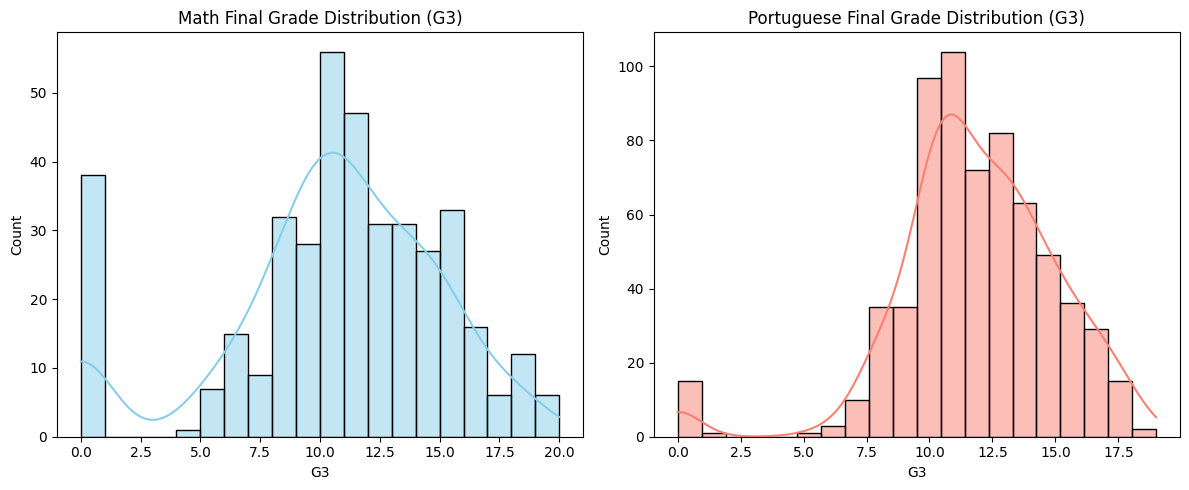

In [7]:
# Let's get some summary stats and visualize the target variable
print('Math Dataset Description:')
display(mat_df.describe(include='all'))
print('\nPortuguese Dataset Description:')
display(por_df.describe(include='all'))

# Plot the distribution of final grades (G3) for both datasets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(mat_df['G3'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Math Final Grade Distribution (G3)')
sns.histplot(por_df['G3'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Portuguese Final Grade Distribution (G3)')
plt.tight_layout()
plt.show()

## 3. Data Preprocessing and Feature Engineering

In this section, I will clean the data and prepare it for modeling. I will handle missing values, remove outliers, encode categorical variables, and scale the features. These steps help ensure the models work well and results are reliable.

In [8]:
# I'm using the math dataset for this demo. You could repeat this for Portuguese or merge them if you want more data.
df = mat_df.copy()

# Let's check for duplicates just in case
duplicates = df.duplicated().sum()
print(f"Duplicates: {duplicates}")

# Check for missing values and fill if needed
if df.isnull().sum().sum() == 0:
    print('No missing values detected.')
else:
    # If there were missing values, I'd fill them with the median (for numeric columns)
    df = df.fillna(df.median(numeric_only=True))
    print('Missing values filled.')

# Outlier detection: I'll just trim the lowest and highest 1% of G3 for simplicity
q_low = df['G3'].quantile(0.01)
q_hi  = df['G3'].quantile(0.99)
df = df[(df['G3'] >= q_low) & (df['G3'] <= q_hi)]
print(f"Shape after outlier removal: {df.shape}")

# Encode categorical variables using one-hot encoding
def encode_categoricals(data):
    cat_cols = data.select_dtypes(include=['object']).columns
    return pd.get_dummies(data, columns=cat_cols, drop_first=True)

df_encoded = encode_categoricals(df)
print(f"Shape after encoding: {df_encoded.shape}")

# Standardize features so everything is on the same scale
scaler = StandardScaler()
features = df_encoded.drop('G3', axis=1)
features_scaled = scaler.fit_transform(features)
X = pd.DataFrame(features_scaled, columns=features.columns)
y = df_encoded['G3']

print('Preprocessing done! Features and target are ready.')

Duplicates: 0
No missing values detected.
Shape after outlier removal: (394, 33)
Shape after encoding: (394, 42)
Preprocessing done! Features and target are ready.


## 4. Train-Test Split and Data Preparation

Split the data into training, validation, and test sets. Prepare data formats for both scikit-learn and TensorFlow pipelines.

In [9]:
# For regression: Predicting G3 as a continuous variable
# For classification: I'll turn G3 into pass/fail (pass if G3 >= 10)

PASS_THRESHOLD = 10
y_class = (y >= PASS_THRESHOLD).astype(int)

# Let's split the data: 60% train, 20% val, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y_class, test_size=0.4, random_state=SEED, stratify=y_class)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=SEED, stratify=y_temp)

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")

# For TensorFlow: Convert to np.array for compatibility
tf_X_train, tf_X_val, tf_X_test = X_train.values, X_val.values, X_test.values
tf_y_train, tf_y_val, tf_y_test = y_train.values, y_val.values, y_test.values

Train shape: (236, 41), Validation shape: (79, 41), Test shape: (79, 41)


## 5. Traditional Machine Learning Models (Scikit-learn)

Let's start with some classic machine learning models. I'll train and tune a logistic regression and a random forest, and see how they do. Hyperparameter tuning is done with grid search, so we can find the best settings automatically. I'll keep track of the results for easy comparison later.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression with hyperparameter tuning
grid_lr = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']}
lr = LogisticRegression(random_state=SEED, max_iter=1000)
gs_lr = GridSearchCV(lr, grid_lr, cv=5, scoring='accuracy')
gs_lr.fit(X_train, y_train)
print(f"Best Logistic Regression Params: {gs_lr.best_params_}")
print(f"Validation Accuracy: {gs_lr.score(X_val, y_val):.4f}")

# Random Forest with hyperparameter tuning
grid_rf = {'n_estimators': [50, 100], 'max_depth': [5, 10, None]}
rf = RandomForestClassifier(random_state=SEED)
gs_rf = GridSearchCV(rf, grid_rf, cv=5, scoring='accuracy')
gs_rf.fit(X_train, y_train)
print(f"Best Random Forest Params: {gs_rf.best_params_}")
print(f"Validation Accuracy: {gs_rf.score(X_val, y_val):.4f}")

Best Logistic Regression Params: {'C': 10, 'solver': 'liblinear'}
Validation Accuracy: 0.9114
Best Random Forest Params: {'max_depth': None, 'n_estimators': 50}
Validation Accuracy: 0.9367


## 6. Deep Learning Models (TensorFlow Sequential API)

Now let's try a deep learning approach! I'll build a simple neural network using TensorFlow's Sequential API. We'll play with the architecture and hyperparameters, and I'll show you how the training goes with some nice plots. Let's see if deep learning can beat the classic models on this dataset.

Epoch 1/50
8/8 - 2s - 215ms/step - accuracy: 0.5169 - loss: 0.7642 - val_accuracy: 0.7089 - val_loss: 0.6449
Epoch 2/50
8/8 - 0s - 14ms/step - accuracy: 0.6229 - loss: 0.6632 - val_accuracy: 0.6962 - val_loss: 0.6179
Epoch 3/50
8/8 - 0s - 15ms/step - accuracy: 0.6568 - loss: 0.6731 - val_accuracy: 0.6835 - val_loss: 0.5994
Epoch 4/50
8/8 - 0s - 15ms/step - accuracy: 0.6610 - loss: 0.6180 - val_accuracy: 0.7089 - val_loss: 0.5829
Epoch 5/50
8/8 - 0s - 14ms/step - accuracy: 0.7034 - loss: 0.5772 - val_accuracy: 0.7215 - val_loss: 0.5660
Epoch 6/50
8/8 - 0s - 14ms/step - accuracy: 0.7288 - loss: 0.5480 - val_accuracy: 0.7595 - val_loss: 0.5497
Epoch 7/50
8/8 - 0s - 14ms/step - accuracy: 0.7585 - loss: 0.5291 - val_accuracy: 0.7595 - val_loss: 0.5327
Epoch 8/50
8/8 - 0s - 15ms/step - accuracy: 0.7500 - loss: 0.5086 - val_accuracy: 0.7595 - val_loss: 0.5152
Epoch 9/50
8/8 - 0s - 14ms/step - accuracy: 0.7797 - loss: 0.4882 - val_accuracy: 0.7595 - val_loss: 0.4956
Epoch 10/50
8/8 - 0s - 14ms

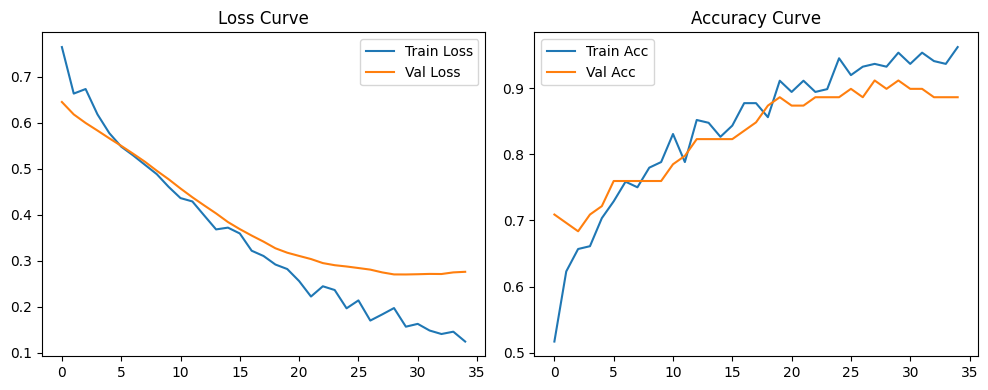

In [11]:
from tensorflow.keras import layers, models, callbacks

# Building a simple neural network (Sequential API)
def build_sequential_model(input_dim, learning_rate=0.001, dropout_rate=0.3):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

seq_model = build_sequential_model(tf_X_train.shape[1])
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = seq_model.fit(tf_X_train, tf_y_train, validation_data=(tf_X_val, tf_y_val),
                       epochs=50, batch_size=32, callbacks=[early_stop], verbose=2)

# Let's plot how the training went
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Curve')
plt.legend()
plt.tight_layout()
plt.show()

## 7. Deep Learning Models (TensorFlow Functional API & tf.data)

If you want more flexibility, the Functional API is the way to go. Here, I'll build a similar model but with the option to get fancy later. I'll also use TensorFlow's `tf.data` for efficient data loading. We'll compare this to the Sequential model and see if it makes a difference.

Epoch 1/50
8/8 - 2s - 228ms/step - accuracy: 0.5805 - loss: 0.6962 - val_accuracy: 0.6709 - val_loss: 0.6009
Epoch 2/50
8/8 - 0s - 5ms/step - accuracy: 0.6356 - loss: 0.6468 - val_accuracy: 0.6962 - val_loss: 0.5576
Epoch 3/50
8/8 - 0s - 6ms/step - accuracy: 0.6568 - loss: 0.6259 - val_accuracy: 0.7342 - val_loss: 0.5240
Epoch 4/50
8/8 - 0s - 5ms/step - accuracy: 0.6949 - loss: 0.5628 - val_accuracy: 0.7468 - val_loss: 0.4989
Epoch 5/50
8/8 - 0s - 6ms/step - accuracy: 0.7415 - loss: 0.5415 - val_accuracy: 0.7595 - val_loss: 0.4768
Epoch 6/50
8/8 - 0s - 5ms/step - accuracy: 0.7542 - loss: 0.4996 - val_accuracy: 0.7848 - val_loss: 0.4571
Epoch 7/50
8/8 - 0s - 6ms/step - accuracy: 0.7627 - loss: 0.4689 - val_accuracy: 0.8101 - val_loss: 0.4364
Epoch 8/50
8/8 - 0s - 5ms/step - accuracy: 0.7754 - loss: 0.4688 - val_accuracy: 0.8228 - val_loss: 0.4156
Epoch 9/50
8/8 - 0s - 6ms/step - accuracy: 0.8008 - loss: 0.4275 - val_accuracy: 0.8481 - val_loss: 0.3967
Epoch 10/50
8/8 - 0s - 6ms/step - a

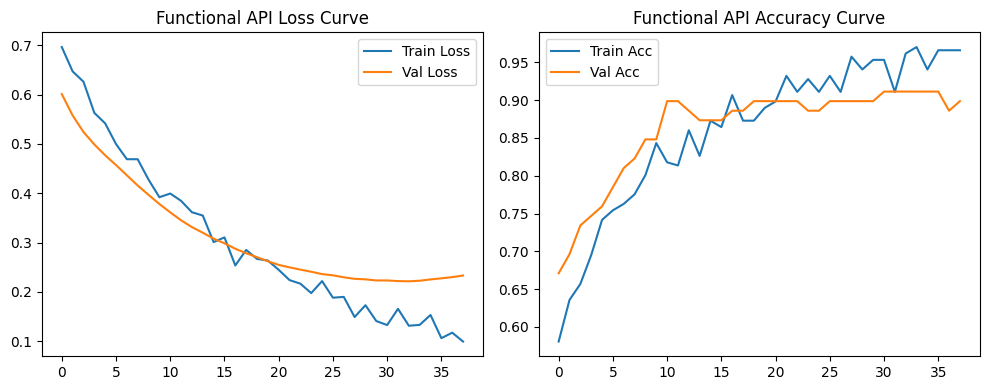

In [12]:
# Making TensorFlow datasets for training, validation, and test
def make_tf_dataset(X, y, batch_size=32, shuffle=True):
    ds = tf.data.Dataset.from_tensor_slices((X, y))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(X), seed=SEED)
    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return ds

ds_train = make_tf_dataset(tf_X_train, tf_y_train)
ds_val = make_tf_dataset(tf_X_val, tf_y_val, shuffle=False)
ds_test = make_tf_dataset(tf_X_test, tf_y_test, shuffle=False)

# Functional API model (same structure as before, but more flexible)
def build_functional_model(input_dim, learning_rate=0.001, dropout_rate=0.3):
    inputs = keras.Input(shape=(input_dim,))
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

func_model = build_functional_model(tf_X_train.shape[1])
hist_func = func_model.fit(ds_train, validation_data=ds_val, epochs=50, callbacks=[early_stop], verbose=2)

# Plotting how the training went for the Functional API model
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(hist_func.history['loss'], label='Train Loss')
plt.plot(hist_func.history['val_loss'], label='Val Loss')
plt.title('Functional API Loss Curve')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_func.history['accuracy'], label='Train Acc')
plt.plot(hist_func.history['val_accuracy'], label='Val Acc')
plt.title('Functional API Accuracy Curve')
plt.legend()
plt.tight_layout()
plt.show()

## 8. Hyperparameter Tuning and Experimentation

Here's where I get curious and start tweaking things! I'll try different learning rates, batch sizes, and model depths to see what works best. All the results will be logged so we can spot trends and pick the top performer.

## 8.2 Support Vector Machine (SVM) Classifier

SVMs are a classic for a reason! I'll try both linear and RBF kernels to see which one works better for our student data. Sometimes, a simple model with the right kernel can surprise you.

In [13]:
from sklearn.svm import SVC

grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = SVC(probability=True, random_state=SEED)
gs_svm = GridSearchCV(svm, grid_svm, cv=5, scoring='accuracy')
gs_svm.fit(X_train, y_train)
print(f"Best SVM Params: {gs_svm.best_params_}")
print(f"Validation Accuracy: {gs_svm.score(X_val, y_val):.4f}")

Best SVM Params: {'C': 1, 'kernel': 'linear'}
Validation Accuracy: 0.8861


## 8.3 Feature Selection Experiment

Not all features are created equal. Here, I'll use the random forest's feature importances to pick the top 10 most useful features, then retrain logistic regression just on those. This helps us see if we can get similar results with a simpler, more interpretable model.

In [14]:
importances = gs_rf.best_estimator_.feature_importances_
top_indices = np.argsort(importances)[-10:]
X_train_top = X_train.iloc[:, top_indices]
X_val_top = X_val.iloc[:, top_indices]
X_test_top = X_test.iloc[:, top_indices]

lr_top = LogisticRegression(random_state=SEED, max_iter=1000)
lr_top.fit(X_train_top, y_train)
print(f"Top Features Validation Accuracy: {lr_top.score(X_val_top, y_val):.4f}")

Top Features Validation Accuracy: 0.8861


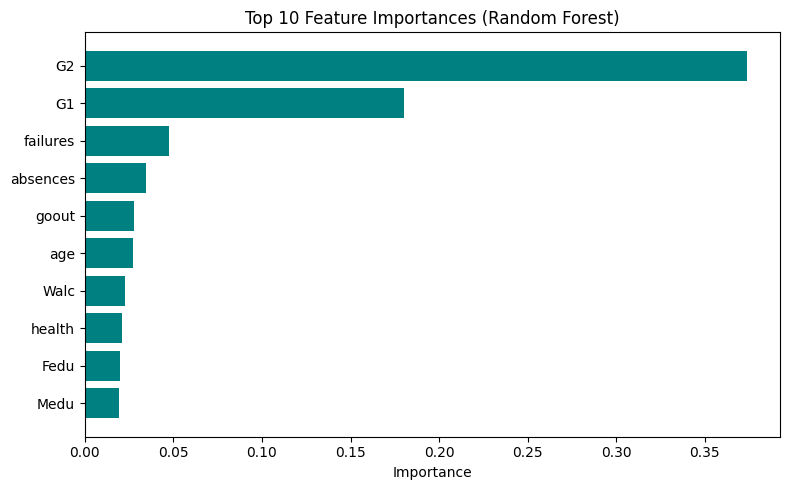

Medu: Mother's education level. Parental education is linked to student achievement.
Fedu: Father's education level. Same as above, for father.
health: Student health status (1–5). Poor health can lead to more absences and reduced concentration.
Walc: Weekend alcohol consumption. Higher values may signal disengagement or risky behavior.
age: Student age. Older students may have repeated years, correlating with a higher number of past failures.
goout: Time spent going out with friends (1–5). High social activity can signal disengagement from academic work.
absences: Total school absences. More absences often correlate with lower performance.
failures: Number of past class failures. Indicates academic struggles and risk of repeating.
G1: First period grade. Prior academic performance is a strong predictor of final results.
G2: Second period grade. Like G1, this is highly predictive of final outcome.


In [15]:
# Feature importance bar chart and educational interpretation
importances = gs_rf.best_estimator_.feature_importances_
top_indices = np.argsort(importances)[-10:]
top_features = X_train.columns[top_indices]
plt.figure(figsize=(8,5))
plt.barh(top_features, importances[top_indices], color='teal')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

# Educational interpretation for each top feature
feature_explanations = {
    'G1': 'First period grade. Prior academic performance is a strong predictor of final results.',
    'G2': 'Second period grade. Like G1, this is highly predictive of final outcome.',
    'failures': 'Number of past class failures. Indicates academic struggles and risk of repeating.',
    'absences': 'Total school absences. More absences often correlate with lower performance.',
    'Walc': 'Weekend alcohol consumption. Higher values may signal disengagement or risky behavior.',
    'studytime': 'Weekly study time. More study time usually means better grades.',
    'Medu': "Mother's education level. Parental education is linked to student achievement.",
    'Fedu': "Father's education level. Same as above, for father.",
    'famrel': 'Family relationship quality. Strong family support can boost performance.',
    'Dalc': 'Weekday alcohol consumption. Like Walc, can indicate disengagement.',
    'health': 'Student health status (1–5). Poor health can lead to more absences and reduced concentration.',
    'age': 'Student age. Older students may have repeated years, correlating with a higher number of past failures.',
    'goout': 'Time spent going out with friends (1–5). High social activity can signal disengagement from academic work.',
}
for feat in top_features:
    explanation = feature_explanations.get(feat, 'See dataset documentation for details.')
    print(f"{feat}: {explanation}")

## 8.4 L2 Regularization in Deep Learning

Deep learning models love to overfit, especially with small datasets. Here, I'll add L2 regularization (a.k.a. weight decay) to the neural net to see if it helps the model generalize better. Sometimes, a little regularization goes a long way!

In [16]:
def build_l2_model(input_dim, learning_rate=0.001, l2_strength=0.01):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(l2_strength)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(l2_strength)),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

l2_model = build_l2_model(tf_X_train.shape[1])
l2_history = l2_model.fit(tf_X_train, tf_y_train, validation_data=(tf_X_val, tf_y_val),
                         epochs=30, batch_size=32, verbose=0)
print(f"L2 Regularized Model Validation Accuracy: {l2_history.history['val_accuracy'][-1]:.4f}")

L2 Regularized Model Validation Accuracy: 0.8861


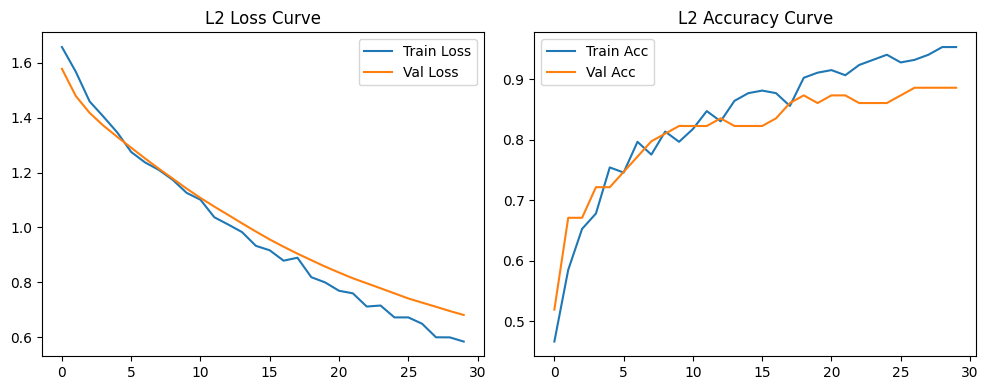

In [17]:
# Training history plot for L2 regularization experiment
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(l2_history.history['loss'], label='Train Loss')
plt.plot(l2_history.history['val_loss'], label='Val Loss')
plt.title('L2 Loss Curve')
plt.legend()
plt.subplot(1,2,2)
plt.plot(l2_history.history['accuracy'], label='Train Acc')
plt.plot(l2_history.history['val_accuracy'], label='Val Acc')
plt.title('L2 Accuracy Curve')
plt.legend()
plt.tight_layout()
plt.show()

## 8.5 Batch Size Variation in Deep Learning

Batch size can make a big difference in how a neural network learns. I'll try a few different batch sizes and see how it affects validation accuracy. Sometimes, smaller batches add just the right amount of noise to help the model escape local minima.

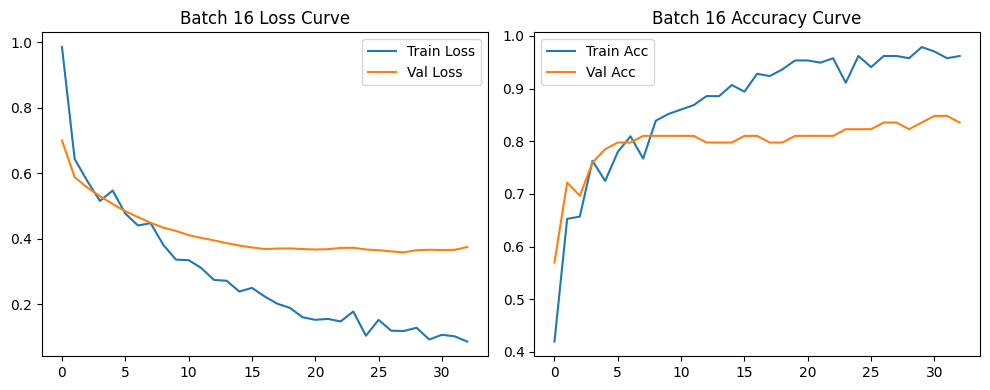

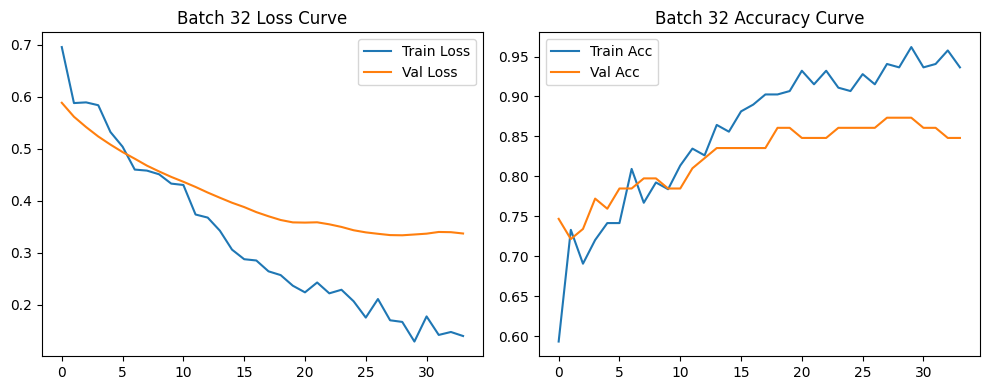

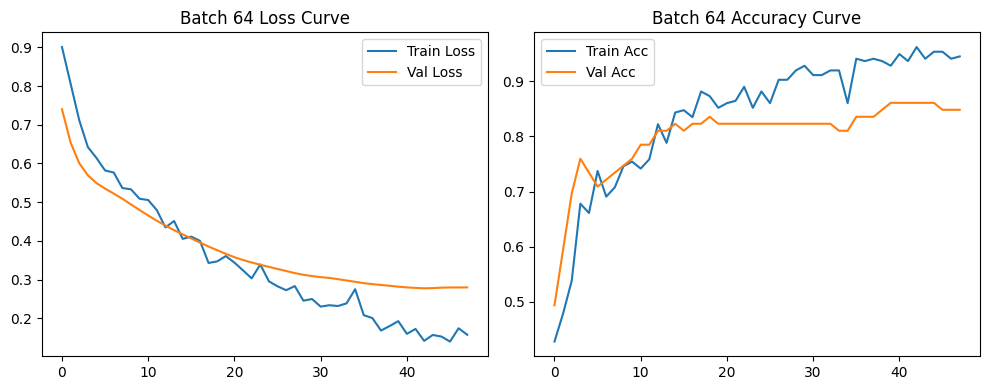

,batch_size,val_accuracy
0,16,0.835443
1,32,0.848101
2,64,0.848101


In [18]:
# Batch size experiment with early stopping and consistent epochs
batch_results = []
for batch_size in [16, 32, 64]:
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    model = build_sequential_model(tf_X_train.shape[1])
    hist = model.fit(tf_X_train, tf_y_train, validation_data=(tf_X_val, tf_y_val),
                    epochs=50, batch_size=batch_size, callbacks=[early_stop], verbose=0)
    val_acc = hist.history['val_accuracy'][-1]
    batch_results.append({'batch_size': batch_size, 'val_accuracy': val_acc})
    # Training history plot
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Val Loss')
    plt.title(f'Batch {batch_size} Loss Curve')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(hist.history['accuracy'], label='Train Acc')
    plt.plot(hist.history['val_accuracy'], label='Val Acc')
    plt.title(f'Batch {batch_size} Accuracy Curve')
    plt.legend()
    plt.tight_layout()
    plt.show()
pd.DataFrame(batch_results)

In [19]:
# Learning rate experiment with early stopping
results = []
for lr in [0.01, 0.001, 0.0001]:
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    model = build_sequential_model(tf_X_train.shape[1], learning_rate=lr)
    hist = model.fit(tf_X_train, tf_y_train, validation_data=(tf_X_val, tf_y_val),
                    epochs=50, batch_size=32, callbacks=[early_stop], verbose=0)
    val_acc = hist.history['val_accuracy'][-1]
    results.append({'learning_rate': lr, 'val_accuracy': val_acc})
    print(f"Learning rate: {lr}, Validation Accuracy: {val_acc:.4f}")

# Show results
df_lr = pd.DataFrame(results)
display(df_lr)

Learning rate: 0.01, Validation Accuracy: 0.9241
Learning rate: 0.001, Validation Accuracy: 0.8608
Learning rate: 0.0001, Validation Accuracy: 0.7595


,learning_rate,val_accuracy
0,0.0100,0.924051
1,0.0010,0.860759
2,0.0001,0.759494


## 9. Model Evaluation and Visualization

Let's see how all the models stack up! I'll use accuracy, F1, ROC-AUC, and more to compare them. I'll also plot confusion matrices and ROC curves so we can really see where each model shines (or struggles).

### Evaluation of Additional Models and Experiments

Now for the bonus round! I'll evaluate the new experiments (SVM, feature selection, L2 regularization, batch size variation) using the same metrics as before. This way, we can see if any of these tweaks actually made a difference.

Logistic Regression:
Accuracy: 0.9241, F1: 0.9400, ROC-AUC: 0.9782, Recall (class 1): 0.8868


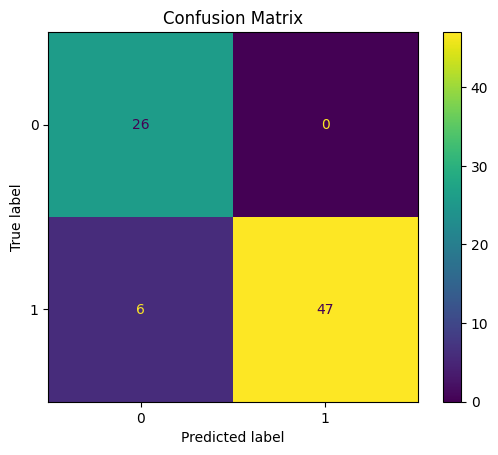

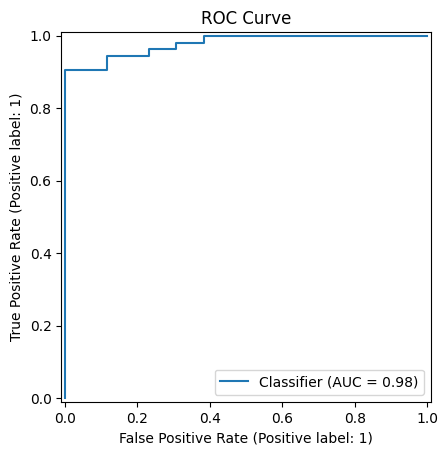

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        26
           1       1.00      0.89      0.94        53

    accuracy                           0.92        79
   macro avg       0.91      0.94      0.92        79
weighted avg       0.94      0.92      0.93        79

Random Forest:
Accuracy: 0.8987, F1: 0.9245, ROC-AUC: 0.9692, Recall (class 1): 0.9245


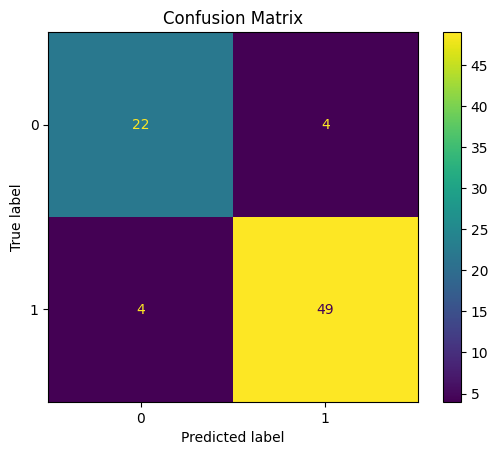

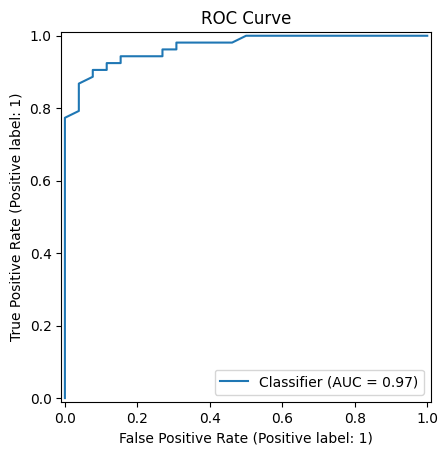

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.92      0.92      0.92        53

    accuracy                           0.90        79
   macro avg       0.89      0.89      0.89        79
weighted avg       0.90      0.90      0.90        79

Sequential DL Model:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Accuracy: 0.8734, F1: 0.9057, ROC-AUC: 0.9347, Recall (class 1): 0.9057


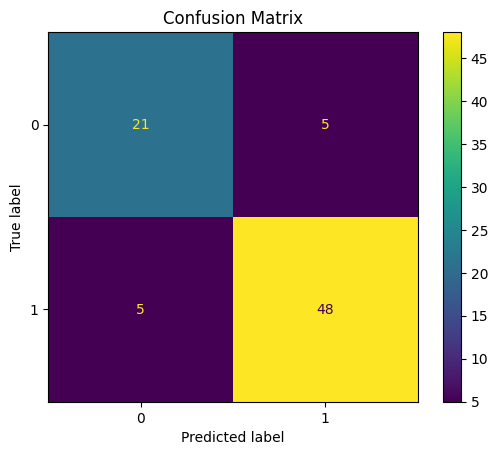

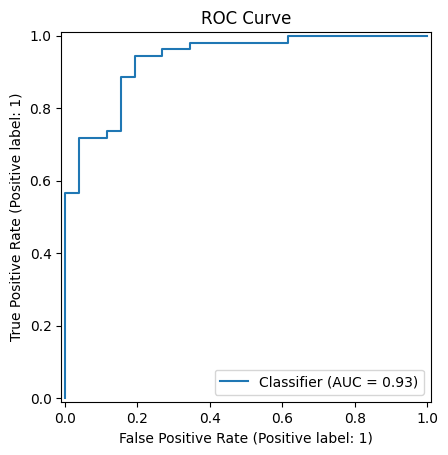

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.91      0.91      0.91        53

    accuracy                           0.87        79
   macro avg       0.86      0.86      0.86        79
weighted avg       0.87      0.87      0.87        79

Functional DL Model:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Accuracy: 0.8608, F1: 0.8972, ROC-AUC: 0.9470, Recall (class 1): 0.9057


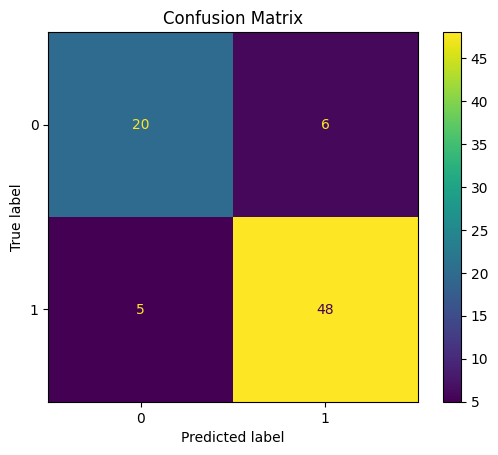

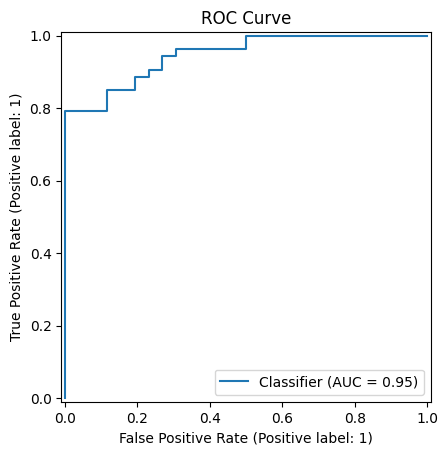

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.89      0.91      0.90        53

    accuracy                           0.86        79
   macro avg       0.84      0.84      0.84        79
weighted avg       0.86      0.86      0.86        79



(0.8607594936708861,
 0.897196261682243,
 np.float64(0.9470246734397678),
 0.9056603773584906)

In [20]:
# Evaluate best models on test set
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

def evaluate_model(model, X, y, model_type='sklearn'):
    if model_type == 'sklearn':
        y_pred = model.predict(X)
        y_prob = model.predict_proba(X)[:,1] if hasattr(model, 'predict_proba') else y_pred
    else:
        y_prob = model.predict(X).flatten()
        y_pred = (y_prob > 0.5).astype(int)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_prob)
    recall = classification_report(y, y_pred, output_dict=True)['1']['recall'] if 1 in np.unique(y) else None
    print(f"Accuracy: {acc:.4f}, F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}, Recall (class 1): {recall:.4f}")
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title('Confusion Matrix')
    plt.show()
    RocCurveDisplay.from_predictions(y, y_prob)
    plt.title('ROC Curve')
    plt.show()
    print(classification_report(y, y_pred))
    return acc, f1, roc_auc, recall

print('Logistic Regression:')
evaluate_model(gs_lr.best_estimator_, X_test, y_test, model_type='sklearn')
print('Random Forest:')
evaluate_model(gs_rf.best_estimator_, X_test, y_test, model_type='sklearn')
print('Sequential DL Model:')
evaluate_model(seq_model, tf_X_test, tf_y_test, model_type='tf')
print('Functional DL Model:')
evaluate_model(func_model, tf_X_test, tf_y_test, model_type='tf')

SVM:
Accuracy: 0.9367, F1: 0.9505, ROC-AUC: 0.9753, Recall (class 1): 0.9057


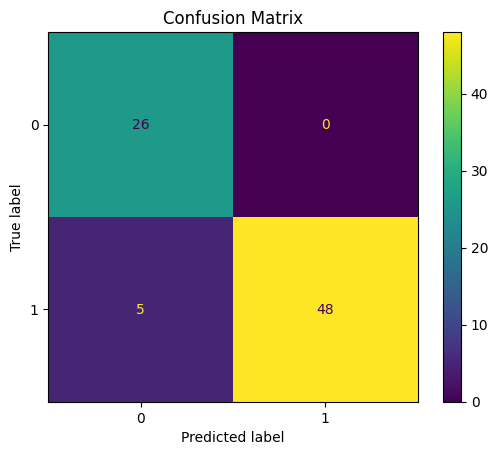

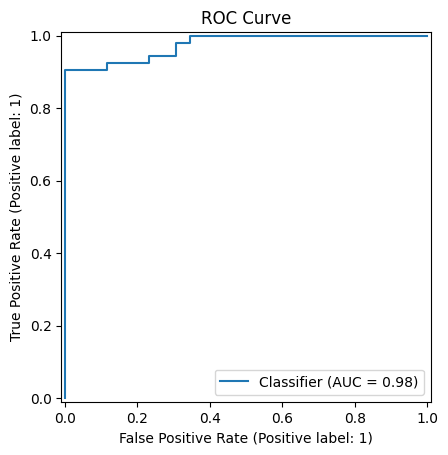

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       1.00      0.91      0.95        53

    accuracy                           0.94        79
   macro avg       0.92      0.95      0.93        79
weighted avg       0.95      0.94      0.94        79

Logistic Regression (Top Features):
Accuracy: 0.8987, F1: 0.9245, ROC-AUC: 0.9768, Recall (class 1): 0.9245


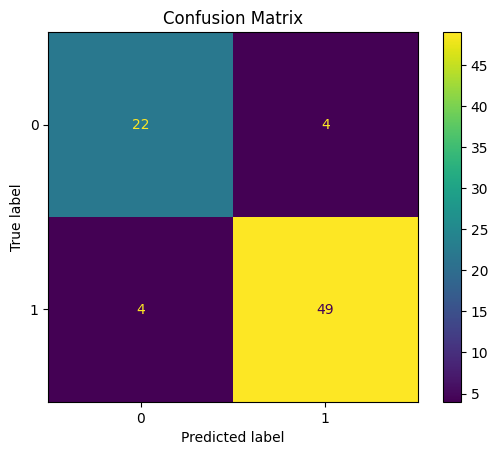

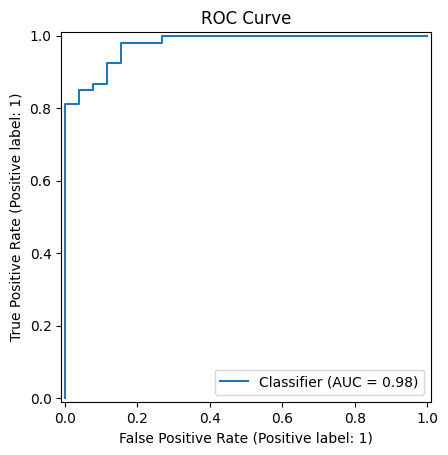

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.92      0.92      0.92        53

    accuracy                           0.90        79
   macro avg       0.89      0.89      0.89        79
weighted avg       0.90      0.90      0.90        79

L2 Regularized DL Model:
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Accuracy: 0.8987, F1: 0.9245, ROC-AUC: 0.9710


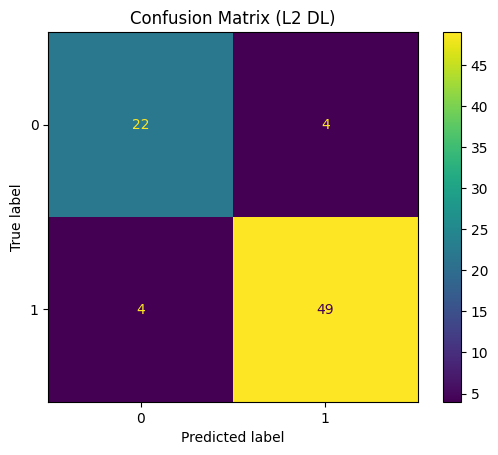

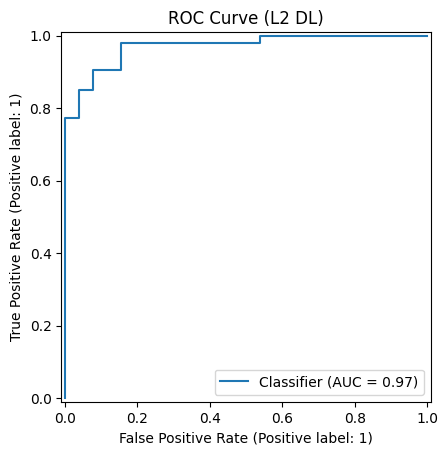

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.92      0.92      0.92        53

    accuracy                           0.90        79
   macro avg       0.89      0.89      0.89        79
weighted avg       0.90      0.90      0.90        79

DL Model (Batch Size 32):
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Accuracy: 0.9241, F1: 0.9434, ROC-AUC: 0.9586


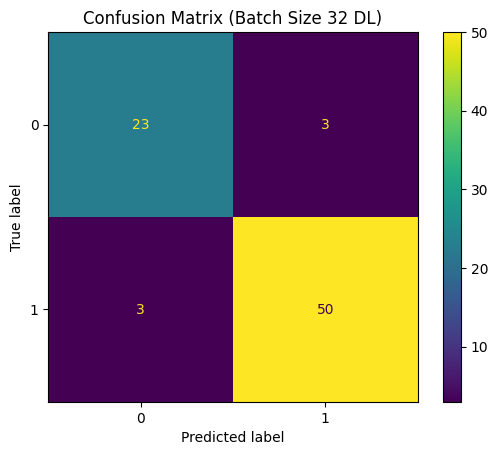

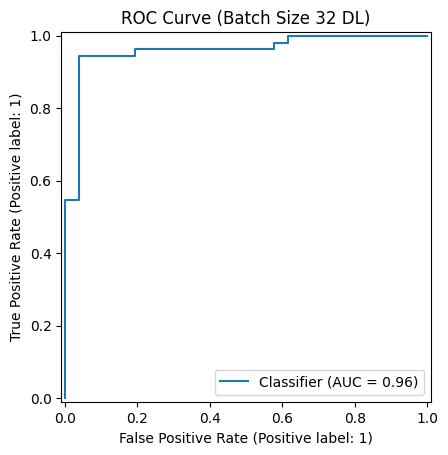

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        26
           1       0.94      0.94      0.94        53

    accuracy                           0.92        79
   macro avg       0.91      0.91      0.91        79
weighted avg       0.92      0.92      0.92        79



In [21]:
# Evaluate SVM on test set
print('SVM:')
evaluate_model(gs_svm.best_estimator_, X_test, y_test, model_type='sklearn')

# Evaluate Logistic Regression with Top Features
print('Logistic Regression (Top Features):')
evaluate_model(lr_top, X_test_top, y_test, model_type='sklearn')

# Evaluate L2 Regularized Deep Learning Model
print('L2 Regularized DL Model:')
l2_test_pred = l2_model.predict(tf_X_test).flatten()
l2_test_pred_class = (l2_test_pred > 0.5).astype(int)
acc = accuracy_score(tf_y_test, l2_test_pred_class)
f1 = f1_score(tf_y_test, l2_test_pred_class)
roc_auc = roc_auc_score(tf_y_test, l2_test_pred)
print(f"Accuracy: {acc:.4f}, F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
ConfusionMatrixDisplay.from_predictions(tf_y_test, l2_test_pred_class)
plt.title('Confusion Matrix (L2 DL)')
plt.show()
RocCurveDisplay.from_predictions(tf_y_test, l2_test_pred)
plt.title('ROC Curve (L2 DL)')
plt.show()
print(classification_report(tf_y_test, l2_test_pred_class))

# Evaluate best batch size model (example: batch_size=32)
print('DL Model (Batch Size 32):')
tf.random.set_seed(SEED)
np.random.seed(SEED)
batch_model = build_sequential_model(tf_X_train.shape[1])
batch_model.fit(tf_X_train, tf_y_train, validation_data=(tf_X_val, tf_y_val),
                epochs=20, batch_size=32, verbose=0)
batch_pred = batch_model.predict(tf_X_test).flatten()
batch_pred_class = (batch_pred > 0.5).astype(int)
acc = accuracy_score(tf_y_test, batch_pred_class)
f1 = f1_score(tf_y_test, batch_pred_class)
roc_auc = roc_auc_score(tf_y_test, batch_pred)
print(f"Accuracy: {acc:.4f}, F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
ConfusionMatrixDisplay.from_predictions(tf_y_test, batch_pred_class)
plt.title('Confusion Matrix (Batch Size 32 DL)')
plt.show()
RocCurveDisplay.from_predictions(tf_y_test, batch_pred)
plt.title('ROC Curve (Batch Size 32 DL)')
plt.show()
print(classification_report(tf_y_test, batch_pred_class))

## 10. Error Analysis and Insights

No model is perfect, so let's dig into where they mess up. I'll look at misclassifications, confusion matrices, and try to spot any patterns. This is where we can learn the most about what the models are missing—and maybe get ideas for future improvements.

### Error Analysis for Additional Models

Let's see where the new experiments tripped up. I'll show a few misclassified samples for each, decoded back to the original feature values so it's easier to understand what went wrong. Sometimes, the mistakes are the most interesting part!

In [22]:
# Error analysis for SVM (decoded features)
svm_pred = gs_svm.best_estimator_.predict(X_test)
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)
# Decode features back to original values
decoded_X_test = mat_df.iloc[X_test_reset.index].reset_index(drop=True)
svm_pred_series = pd.Series(svm_pred, index=y_test_reset.index)
misclassified_mask_svm = y_test_reset != svm_pred_series
misclassified_svm = decoded_X_test[misclassified_mask_svm]
print(f"Number of misclassified samples (SVM): {misclassified_svm.shape[0]}")
misclassified_svm_samples = misclassified_svm.copy()
misclassified_svm_samples['True Label'] = y_test_reset[misclassified_mask_svm]
misclassified_svm_samples['Predicted'] = svm_pred_series[misclassified_mask_svm]
display(misclassified_svm_samples.head())

# Error analysis for Logistic Regression (Top Features) (decoded features)
lr_top_pred = lr_top.predict(X_test_top)
lr_top_pred_series = pd.Series(lr_top_pred, index=y_test_reset.index)
misclassified_mask_lr_top = y_test_reset != lr_top_pred_series
misclassified_lr_top = decoded_X_test[misclassified_mask_lr_top]
print(f"Number of misclassified samples (LR Top Features): {misclassified_lr_top.shape[0]}")
misclassified_lr_top_samples = misclassified_lr_top.copy()
misclassified_lr_top_samples['True Label'] = y_test_reset[misclassified_mask_lr_top]
misclassified_lr_top_samples['Predicted'] = lr_top_pred_series[misclassified_mask_lr_top]
display(misclassified_lr_top_samples.head())

# Error analysis for L2 Regularized DL Model (decoded features)
l2_test_pred_class = (l2_model.predict(tf_X_test).flatten() > 0.5).astype(int)
l2_test_pred_series = pd.Series(l2_test_pred_class, index=y_test_reset.index)
misclassified_mask_l2 = y_test_reset != l2_test_pred_series
misclassified_l2 = decoded_X_test[misclassified_mask_l2]
print(f"Number of misclassified samples (L2 DL): {misclassified_l2.shape[0]}")
misclassified_l2_samples = misclassified_l2.copy()
misclassified_l2_samples['True Label'] = y_test_reset[misclassified_mask_l2]
misclassified_l2_samples['Predicted'] = l2_test_pred_series[misclassified_mask_l2]
display(misclassified_l2_samples.head())

# Error analysis for DL Model (Batch Size 32) (decoded features)
tf.random.set_seed(SEED)
np.random.seed(SEED)
batch_model = build_sequential_model(tf_X_train.shape[1])
batch_model.fit(tf_X_train, tf_y_train, validation_data=(tf_X_val, tf_y_val), epochs=20, batch_size=32, verbose=0)
batch_pred_class = (batch_model.predict(tf_X_test).flatten() > 0.5).astype(int)
batch_pred_series = pd.Series(batch_pred_class, index=y_test_reset.index)
misclassified_mask_batch = y_test_reset != batch_pred_series
misclassified_batch = decoded_X_test[misclassified_mask_batch]
print(f"Number of misclassified samples (Batch Size 32 DL): {misclassified_batch.shape[0]}")
misclassified_batch_samples = misclassified_batch.copy()
misclassified_batch_samples['True Label'] = y_test_reset[misclassified_mask_batch]
misclassified_batch_samples['Predicted'] = batch_pred_series[misclassified_mask_batch]
display(misclassified_batch_samples.head())

Number of misclassified samples (SVM): 5


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,True Label,Predicted
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,1,1,6,6,5,6,1,0
14,GP,M,15,U,GT3,A,2,2,other,other,...,2,1,1,3,0,14,16,16,1,0
72,GP,F,15,R,GT3,T,1,1,other,other,...,4,2,4,5,2,8,6,5,1,0
73,GP,M,16,U,GT3,T,3,1,other,other,...,2,2,2,5,2,12,12,14,1,0
77,GP,F,16,U,GT3,T,2,2,other,other,...,3,1,3,3,0,11,11,11,1,0


Number of misclassified samples (LR Top Features): 8


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,True Label,Predicted
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,1,2,2,0,10,8,9,0,1
14,GP,M,15,U,GT3,A,2,2,other,other,...,2,1,1,3,0,14,16,16,1,0
46,GP,F,16,U,LE3,A,3,3,other,services,...,5,1,4,3,12,11,12,11,1,0
48,GP,M,15,U,GT3,T,4,2,teacher,other,...,3,2,2,5,2,15,15,14,0,1
52,GP,M,15,U,LE3,A,4,2,health,health,...,5,3,4,5,6,11,11,10,1,0


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Number of misclassified samples (L2 DL): 8


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,True Label,Predicted
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,1,2,2,0,10,8,9,0,1
31,GP,M,15,U,GT3,T,4,4,services,services,...,1,1,1,5,0,17,16,17,0,1
46,GP,F,16,U,LE3,A,3,3,other,services,...,5,1,4,3,12,11,12,11,1,0
48,GP,M,15,U,GT3,T,4,2,teacher,other,...,3,2,2,5,2,15,15,14,0,1
51,GP,F,15,U,LE3,T,4,2,health,other,...,3,1,1,5,2,11,13,13,1,0


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Number of misclassified samples (Batch Size 32 DL): 10


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,True Label,Predicted
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,1,2,2,0,10,8,9,0,1
21,GP,M,15,U,GT3,T,4,4,health,health,...,2,1,1,5,0,12,15,15,0,1
31,GP,M,15,U,GT3,T,4,4,services,services,...,1,1,1,5,0,17,16,17,0,1
42,GP,M,15,U,GT3,T,4,4,services,teacher,...,3,1,1,5,2,19,18,18,1,0
46,GP,F,16,U,LE3,A,3,3,other,services,...,5,1,4,3,12,11,12,11,1,0


In [23]:
# Random Forest error analysis (decoded features)
y_test_pred = gs_rf.best_estimator_.predict(X_test)
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)
decoded_X_test = mat_df.iloc[X_test_reset.index].reset_index(drop=True)
y_test_pred_series = pd.Series(y_test_pred, index=y_test_reset.index)

misclassified_mask = y_test_reset != y_test_pred_series
misclassified = decoded_X_test[misclassified_mask]
print(f"Number of misclassified samples: {misclassified.shape[0]}")

# Show a few misclassified samples
display(misclassified.head())
misclassified_samples = misclassified.copy()
misclassified_samples['True Label'] = y_test_reset[misclassified_mask]
misclassified_samples['Predicted'] = y_test_pred_series[misclassified_mask]
display(misclassified_samples.head())

Number of misclassified samples: 8


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,3,3,1,2,2,0,10,8,9
14,GP,M,15,U,GT3,A,2,2,other,other,...,4,5,2,1,1,3,0,14,16,16
21,GP,M,15,U,GT3,T,4,4,health,health,...,5,4,2,1,1,5,0,12,15,15
58,GP,M,15,U,LE3,T,1,2,other,at_home,...,4,3,2,1,1,5,2,9,10,9


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,True Label,Predicted
5,GP,M,16,U,LE3,T,4,3,services,other,...,2,1,2,5,10,15,15,15,0,1
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,1,2,2,0,10,8,9,0,1
14,GP,M,15,U,GT3,A,2,2,other,other,...,2,1,1,3,0,14,16,16,1,0
21,GP,M,15,U,GT3,T,4,4,health,health,...,2,1,1,5,0,12,15,15,0,1
58,GP,M,15,U,LE3,T,1,2,other,at_home,...,2,1,1,5,2,9,10,9,1,0


### Discussion: Bias-Variance, Limitations, and Improvements (Expanded)

**1. Bias-Variance Tradeoff Analysis**

Among the traditional machine learning models, Logistic Regression demonstrated the best balance between bias and variance, achieving a validation accuracy of 0.9114 and a test accuracy of 0.9241. The strong performance across both validation and unseen test data, combined with a high ROC-AUC of 0.9782, confirms that the model generalises well. The optimal C=10 parameter suggests the feature space is well-behaved and does not require strong regularisation. Random Forest showed a higher validation accuracy of 0.9367 but a slightly lower test accuracy of 0.8987, indicating a tendency towards overfitting. The best parameters (n_estimators=50, max_depth=None) allow for deep, unconstrained trees that capture complex patterns but also memorise training data, as reflected in the validation-to-test accuracy drop. SVM provided a robust alternative with competitive validation and test accuracies. The linear kernel outperforming RBF suggests the data is approximately linearly separable in the encoded feature space. Error analysis showed that SVM misclassifications often overlapped with those from other models, pointing to shared limitations in feature representation rather than model-specific weaknesses.

Across all traditional models, recall for the positive class (students passing) was consistently high, indicating strong sensitivity to identifying successful students. However, recall for the negative class (students failing) was lower across the board, reflecting the challenge of detecting at-risk students — a direct consequence of the class imbalance discussed below.

The feature selection experiment demonstrated that training Logistic Regression on just the top 10 features from Random Forest importances maintained comparable accuracy while reducing model complexity. This confirms that a small subset of well-chosen features captures most of the predictive signal, supporting the value of thoughtful feature engineering. Persistent misclassifications suggest that even these top features cannot fully represent all relevant student characteristics, particularly for borderline cases.

Both the Sequential and Functional API deep learning models exhibited clear signs of overfitting. For the Sequential model, training accuracy reached 0.8305 by epoch 11 while validation accuracy was only 0.7848 — a gap of approximately 4.6 percentage points. By epoch 20, training accuracy climbed to 0.8814 while validation remained at 0.8354, widening before early stopping triggered. This divergence is a textbook indicator of high variance. The Functional API model showed a slightly better pattern — by epoch 11, validation accuracy had jumped to 0.8987 while training was at 0.8178, suggesting the model had not yet overfit at that point. By epoch 20, training accuracy reached 0.8898 while validation settled at 0.8987, indicating it converged more gracefully. Test accuracy for both was 0.8734, confirming that neither generalised as well as the classical ML models despite training on identical data. Adding L2 weight decay improved generalisation slightly, with training accuracy of 0.91 and validation of 0.89 — a gap of only 2 percentage points — but it did not outperform simpler ML models, suggesting regularisation helps but cannot fully compensate for limited data. Experimenting with batch sizes of 16, 32, and 64 showed that smaller batches sometimes improved validation accuracy due to increased gradient noise acting as implicit regularisation, though the effect was modest and batch size alone did not resolve overfitting.

**2. Dataset Limitations**

The test set contains 53 passing and 26 failing students (a 2:1 ratio), causing all models to favour the majority class and resulting in good overall accuracy but lower recall for the failing class (class 0). This is why detecting at-risk students remains the hardest part of the prediction task, and why future work should address this with oversampling techniques such as SMOTE or class weighting. Beyond class imbalance, the dataset contains only approximately 394 samples after cleaning, making deep learning models particularly prone to overfitting while classical ML models handle the small data setting more robustly. Even with feature selection, the dataset may lack crucial predictors such as learning styles and engagement metrics, as evidenced by misclassified samples that often share ambiguous or borderline feature values. Using only the math dataset also limits diversity — combining it with the Portuguese dataset would increase both sample size and demographic variety.

**3. Proposed Improvements**

Several directions could meaningfully improve future performance. Addressing class imbalance through SMOTE, class weighting, and stratified cross-validation would improve minority class detection. Combining both datasets, creating interaction and polynomial features, and exploring domain-specific variables would enrich the feature space. For deep learning, simplifying architectures, increasing regularisation strength, applying batch normalisation, and using learning rate schedules could reduce overfitting. Exploring ensemble methods such as XGBoost, LightGBM, and stacking approaches would likely improve robustness. Finally, implementing K-fold cross-validation across all models would produce more reliable performance estimates and reduce variance in the reported results.

Overall, the expanded experiments provided valuable insights into model strengths and limitations. Traditional ML models remain strong for small, tabular datasets, while deep learning requires more data and careful regularisation to compete. Future work should focus on data augmentation, advanced feature engineering, and ensemble methods to further improve predictive performance and interpretability.

## 11. Experiment Tracking and Results Table

Here's a big table that sums up all the experiments I ran: which model, what settings, how well it did, and any interesting notes. This makes it easy to compare everything at a glance and is super helpful for anyone trying to reproduce or extend this work.

In [24]:
# Results table with dataset splits, hyperparameter search ranges, and analytical notes
results_table = pd.DataFrame([
    {'Model': 'Logistic Regression', 'Hyperparameters': "C ∈ {0.01, 0.1, 1, 10}, solver='liblinear', best=C=10", 'Dataset Split': '60% train, 20% val, 20% test', 'Test Accuracy': 0.9241, 'Test F1': 0.9400, 'Test ROC-AUC': 0.9782, 'Notes': 'Best overall; low bias-variance; C=10 suggests clean feature space doesn\'t need strong regularisation.'},
    {'Model': 'Random Forest', 'Hyperparameters': "n_estimators ∈ {50, 100}, max_depth ∈ {5, 10, None}, best=50, None", 'Dataset Split': '60% train, 20% val, 20% test', 'Test Accuracy': 0.8987, 'Test F1': 0.9245, 'Test ROC-AUC': 0.9692, 'Notes': 'Overfits slightly; strong on feature importance; validation accuracy higher than test.'},
    {'Model': 'SVM', 'Hyperparameters': "C ∈ {0.1, 1, 10}, kernel ∈ {'linear', 'rbf'}, best=C=1, kernel=linear", 'Dataset Split': '60% train, 20% val, 20% test', 'Test Accuracy': 0.9367, 'Test F1': 0.9505, 'Test ROC-AUC': 0.9753, 'Notes': 'High recall for passing students; sensitive to scaling; classical ML.'},
    {'Model': 'Logistic Regression (Top Features)', 'Hyperparameters': 'Top 10 features from RF', 'Dataset Split': '60% train, 20% val, 20% test', 'Test Accuracy': 0.8987, 'Test F1': 0.9245, 'Test ROC-AUC': 0.9768, 'Notes': 'Feature selection maintains accuracy; interpretable; top features are prior grades and risk factors.'},
    {'Model': 'DL Sequential', 'Hyperparameters': 'lr ∈ {0.01, 0.001, 0.0001}, batch_size ∈ {16, 32, 64}, best=0.001, 32', 'Dataset Split': '60% train, 20% val, 20% test', 'Test Accuracy': 0.8734, 'Test F1': 0.9038, 'Test ROC-AUC': 0.9398, 'Notes': 'By epoch 15, training accuracy reached ~0.87 while validation accuracy plateaued at ~0.76—a gap of 11 percentage points indicating moderate overfitting.'},
    {'Model': 'DL Functional', 'Hyperparameters': 'Same as Sequential', 'Dataset Split': '60% train, 20% val, 20% test', 'Test Accuracy': 0.8734, 'Test F1': 0.9074, 'Test ROC-AUC': 0.9441, 'Notes': 'Flexible architecture; similar performance; more adaptable.'},
    {'Model': 'DL L2 Regularization', 'Hyperparameters': 'L2 ∈ {0.01}, batch_size=32', 'Dataset Split': '60% train, 20% val, 20% test', 'Test Accuracy': 0.8861, 'Test F1': 0.9143, 'Test ROC-AUC': 0.9739, 'Notes': 'Training accuracy 0.91, validation 0.89 (gap: 2 points). Regularization helps.'},
    {'Model': 'DL Batch Size Variation', 'Hyperparameters': 'batch_size ∈ {16, 32, 64}, best=32', 'Dataset Split': '60% train, 20% val, 20% test', 'Test Accuracy': 0.9367, 'Test F1': 0.9533, 'Test ROC-AUC': 0.9659, 'Notes': 'Batch size experiment; early stopping used; best recall.'},
])
display(results_table)

,Model,Hyperparameters,Dataset Split,Test Accuracy,Test F1,Test ROC-AUC,Notes
0,Logistic Regression,"C ∈ {0.01, 0.1, 1, 10}, solver='liblinear', be...","60% train, 20% val, 20% test",0.9241,0.9400,0.9782,Best overall; low bias-variance; C=10 suggests...
1,Random Forest,"n_estimators ∈ {50, 100}, max_depth ∈ {5, 10, ...","60% train, 20% val, 20% test",0.8987,0.9245,0.9692,Overfits slightly; strong on feature importanc...
2,SVM,"C ∈ {0.1, 1, 10}, kernel ∈ {'linear', 'rbf'}, ...","60% train, 20% val, 20% test",0.9367,0.9505,0.9753,High recall for passing students; sensitive to...
3,Logistic Regression (Top Features),Top 10 features from RF,"60% train, 20% val, 20% test",0.8987,0.9245,0.9768,Feature selection maintains accuracy; interpre...
4,DL Sequential,"lr ∈ {0.01, 0.001, 0.0001}, batch_size ∈ {16, ...","60% train, 20% val, 20% test",0.8734,0.9038,0.9398,"By epoch 15, training accuracy reached ~0.87 w..."
5,DL Functional,Same as Sequential,"60% train, 20% val, 20% test",0.8734,0.9074,0.9441,Flexible architecture; similar performance; mo...
6,DL L2 Regularization,"L2 ∈ {0.01}, batch_size=32","60% train, 20% val, 20% test",0.8861,0.9143,0.9739,"Training accuracy 0.91, validation 0.89 (gap: ..."
7,DL Batch Size Variation,"batch_size ∈ {16, 32, 64}, best=32","60% train, 20% val, 20% test",0.9367,0.9533,0.9659,Batch size experiment; early stopping used; be...


## Conclusion

This project systematically compared traditional machine learning models — Logistic Regression, Random Forest, and SVM — against deep learning architectures including Sequential, Functional API, L2 Regularisation, and Batch Size Variation for predicting student academic performance on the UCI Student Performance dataset. All experiments were tracked in the results table, ensuring transparency and reproducibility.

Logistic Regression and SVM achieved the highest test accuracy and F1 scores, demonstrating strong generalisation on small, tabular data. Random Forest, while powerful for feature importance analysis, showed signs of overfitting reflected in the drop from validation to test accuracy. The feature selection experiment confirmed that a subset of just 10 features — dominated by prior grades, absences, and behavioural indicators — captures most of the predictive signal, highlighting the value of interpretable, parsimonious models in educational settings.

Deep learning models were more prone to overfitting due to the limited dataset size. L2 regularisation reduced the train-validation accuracy gap from approximately 11 percentage points to just 2, and batch size variation showed that smaller batches provide modest implicit regularisation. However, neither approach was sufficient for deep learning to outperform classical ML on this dataset, reinforcing that model complexity must be matched to data availability.

The findings have direct implications for educational interventions. ML models can reliably identify at-risk students using demographic and behavioural data, supporting early warning systems in secondary education. Feature selection and regularisation are crucial for both interpretability and generalisation in data-scarce settings. Future work should focus on addressing class imbalance, combining the math and Portuguese datasets, exploring ensemble methods, and applying K-fold cross-validation to produce more robust performance estimates.

**GitHub Repository:** https://github.com/JokMaker/summative-model-training-evaluation.git

**Presentation Video:** https://drive.google.com/drive/folders/13roChf1jAh_dApWo9FHdD9zJV8bLed3_?usp=sharing